In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("max_columns", None) # show all cols
pd.set_option('max_colwidth', None) # show full width of showing cols
pd.set_option("expand_frame_repr", False) # print cols side by side as it's supposed to be
pd.options.display.max_seq_items = 200000
pd.options.display.max_rows = 400000

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN    NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN    NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN    NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          75

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.shape

(1460, 81)

# Preprocessing

In [7]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [8]:
df.isnull().sum()/len(df)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [9]:
# Dropping columns 

df.drop(['Id', 'PoolQC', 'Fence', 'MiscFeature', 'Alley', 'FireplaceQu'], 1, inplace = True)

In [10]:
# seeing only numerical data
df.select_dtypes(include = ['float64' , 'int64'])

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice
0             60         65.0     8450            7            5       2003          2003       196.0         706           0        150          856       856       854             0       1710             1             0         2         1             3             1             8           0       2003.0           2         548           0           61              0          0            0         0        0       2    2008     208500
1             20         80.0     9600            6            8       1976          1976         0.0         978           0        284         1262      1262         0             0       1262             0             1         2         0             3             1             6           1       1976.0           2         460         298            0              0          0            0         0        0       5    2007     181500
2             60         68.0    11250            7            5       2001          2002       162.0         486           0        434          920       920       866             0       1786             1             0         2         1             3             1             6           1       2001.0           2         608           0           42              0          0            0         0        0       9    2008     223500
3             70         60.0     9550            7            5       1915          1970         0.0         216           0        540          756       961       756             0       1717             1             0         1         0             3             1             7           1       1998.0           3         642           0           35            272          0            0         0        0       2    2006     140000
4             60         84.0    14260            8            5       2000          2000       350.0         655           0        490         1145      1145      1053             0       2198             1             0         2         1             4             1             9           1       2000.0           3         836         192           84              0          0            0         0        0      12    2008     250000
5             50         85.0    14115            5            5       1993          1995         0.0         732           0         64          796       796       566             0       1362             1             0         1         1             1             1             5           0       1993.0           2         480          40           30              0        320            0         0      700      10    2009     143000
6             20         75.0    10084            8            5       2004          2005       186.0        1369           0        317         1686      1694         0             0       1694             1             0         2         0             3             1             7           1       2004.0           2         636         255           57              0          0            0         0        0       8    2007     307000
7             60          NaN    10382            7            6       1973          1973       240.0         859          32        216         1107      1107       983             0       2090             1             0         2         1             3             1             7           2       1973.0           2         484         235          204            228          0            0         0      350      11    2009     200000
8         

In [11]:
df.select_dtypes(include = ['object']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [12]:


def convert_to_numerical(col_list):
    for col in col_list:
        df[col] = df[col].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], [5,4,3,2,1,0])
        
column_list = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']
convert_to_numerical(column_list)

In [13]:
def convert_to_numerical1(col_list1):
    for col1 in col_list1:
        df[col1] = df[col1].replace(['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'], [6,5,4,3,2,1,0])

column_list1 = ['BsmtFinType1', 'BsmtFinType2' ]
convert_to_numerical1(column_list1)

In [14]:
df['Street'] = df['Street'].replace(['Pave', 'Grvl'], [1,0])

In [15]:
df['LotShape'] = df['LotShape'].replace(['Reg', 'IR1', 'IR2', 'IR3'], [3,2,1,0])

In [16]:
df['LandContour'] = df['LandContour'].replace(['Lvl', 'Bnk', 'HLS', 'Low'], [3,2,1,0])

In [17]:
df['Utilities'] = df['Utilities'].replace(['AllPub', 'NoSewr', 'NoSeWa', 'ELO'], [3,2,1,0])

In [18]:
df['LandSlope'] = df['LandSlope'].replace(['Gtl', 'Mod', 'Sev'], [2,1,0])

In [19]:
df['CentralAir'] = df['CentralAir'].replace(['Y', 'N'], [1,0])

In [20]:
df['Electrical'] = df['Electrical'].replace(['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix'], [4,3,2,1,0])

In [21]:
df['Functional'] = df['Functional'].replace(['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal'], [7,6,5,4,3,2,1,0])

In [22]:
df['GarageType'] = df['GarageType'].replace(['2Types', 'Attchd', 'Basment','BuiltIn','CarPort','Detchd','NA'],[6,5,4,3,2,1,0])

In [23]:
df['GarageFinish'] = df['GarageFinish'].replace(['Fin', 'RFn', 'Unf', 'NA'], [3,2,1,0])

In [24]:
df['PavedDrive'] = df['PavedDrive'].replace(['Y', 'P', 'N'], [2,1,0])

In [25]:
df['BsmtExposure'] = df['BsmtExposure'].replace(['Gd', 'Av', 'Mn','No','NA'], [4,3,2,1,0])

In [26]:
df['HouseStyle'] =df['HouseStyle'].replace(['SLvl','SFoyer','2.5Unf', '2.5Fin','2Story','1.5Unf','1.5Fin','1Story'], [7,6,5,4,3,2,1,0])

In [27]:
object_col_list = df.select_dtypes(include = 'object').columns
len(list(object_col_list))
object_col_list

Index(['MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'Foundation', 'Heating', 'SaleType', 'SaleCondition'],
      dtype='object')

In [28]:
#creating new columns: 1) Age - how old the house is, 2)Age_YearRemodAdd
#3) yrSold_ago - how many years before was the hourse sold
#4) Age_GarageYrBlt - how many years before was the garage made

df['Age'] = df['YearBuilt'].apply(lambda x: 2023 - x)
df['Age_YearRemodAdd'] = df['YearRemodAdd'].apply(lambda x: 2023 - x)
df['YrSold_Ago'] = df['YrSold'].apply(lambda x: 2023 - x)
df['Age_GarageYrBlt'] = df['GarageYrBlt'].apply(lambda x: 2023 - x)

In [29]:
# Dropping columns that are no more required

df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], 1, inplace = True)

In [30]:
df.corr().loc[:, ['SalePrice']].sort_values('SalePrice', ascending = False)

SalePrice
SalePrice          1.000000
OverallQual        0.790982
GrLivArea          0.708624
ExterQual          0.682639
KitchenQual        0.659600
BsmtQual           0.644019
GarageCars         0.640409
GarageArea         0.623431
TotalBsmtSF        0.613581
1stFlrSF           0.605852
FullBath           0.560664
TotRmsAbvGrd       0.533723
GarageFinish       0.513105
MasVnrArea         0.477493
Fireplaces         0.466929
HeatingQC          0.427649
BsmtFinSF1         0.386420
GarageType         0.358279
BsmtExposure       0.352958
LotFrontage        0.351799
WoodDeckSF         0.324413
2ndFlrSF           0.319334
OpenPorchSF        0.315856
HalfBath           0.284108
BsmtFinType1       0.277436
LotArea            0.263843
CentralAir         0.251328
Electrical         0.233590
PavedDrive         0.231357
BsmtFullBath       0.227122
BsmtUnfSF          0.214479
BedroomAbvGr       0.168213
BsmtCond           0.160658
GarageQual         0.156693
GarageCond         0.125013
ScreenPorch        0.111447
Functional         0.107619
PoolArea           0.092404
HouseStyle         0.063547
MoSold             0.046432
3SsnPorch          0.044584
Street             0.041036
YrSold_Ago         0.028923
ExterCond          0.018899
Utilities          0.014314
BsmtFinSF2        -0.011378
BsmtHalfBath      -0.016844
MiscVal           -0.021190
LowQualFinSF      -0.025606
BsmtFinType2      -0.040139
LandSlope         -0.051152
LandContour       -0.073042
OverallCond       -0.077856
MSSubClass        -0.084284
EnclosedPorch     -0.128578
KitchenAbvGr      -0.135907
LotShape          -0.267759
Age_GarageYrBlt   -0.486362
Age_YearRemodAdd  -0.507101
Age               -0.522897

<AxesSubplot:>

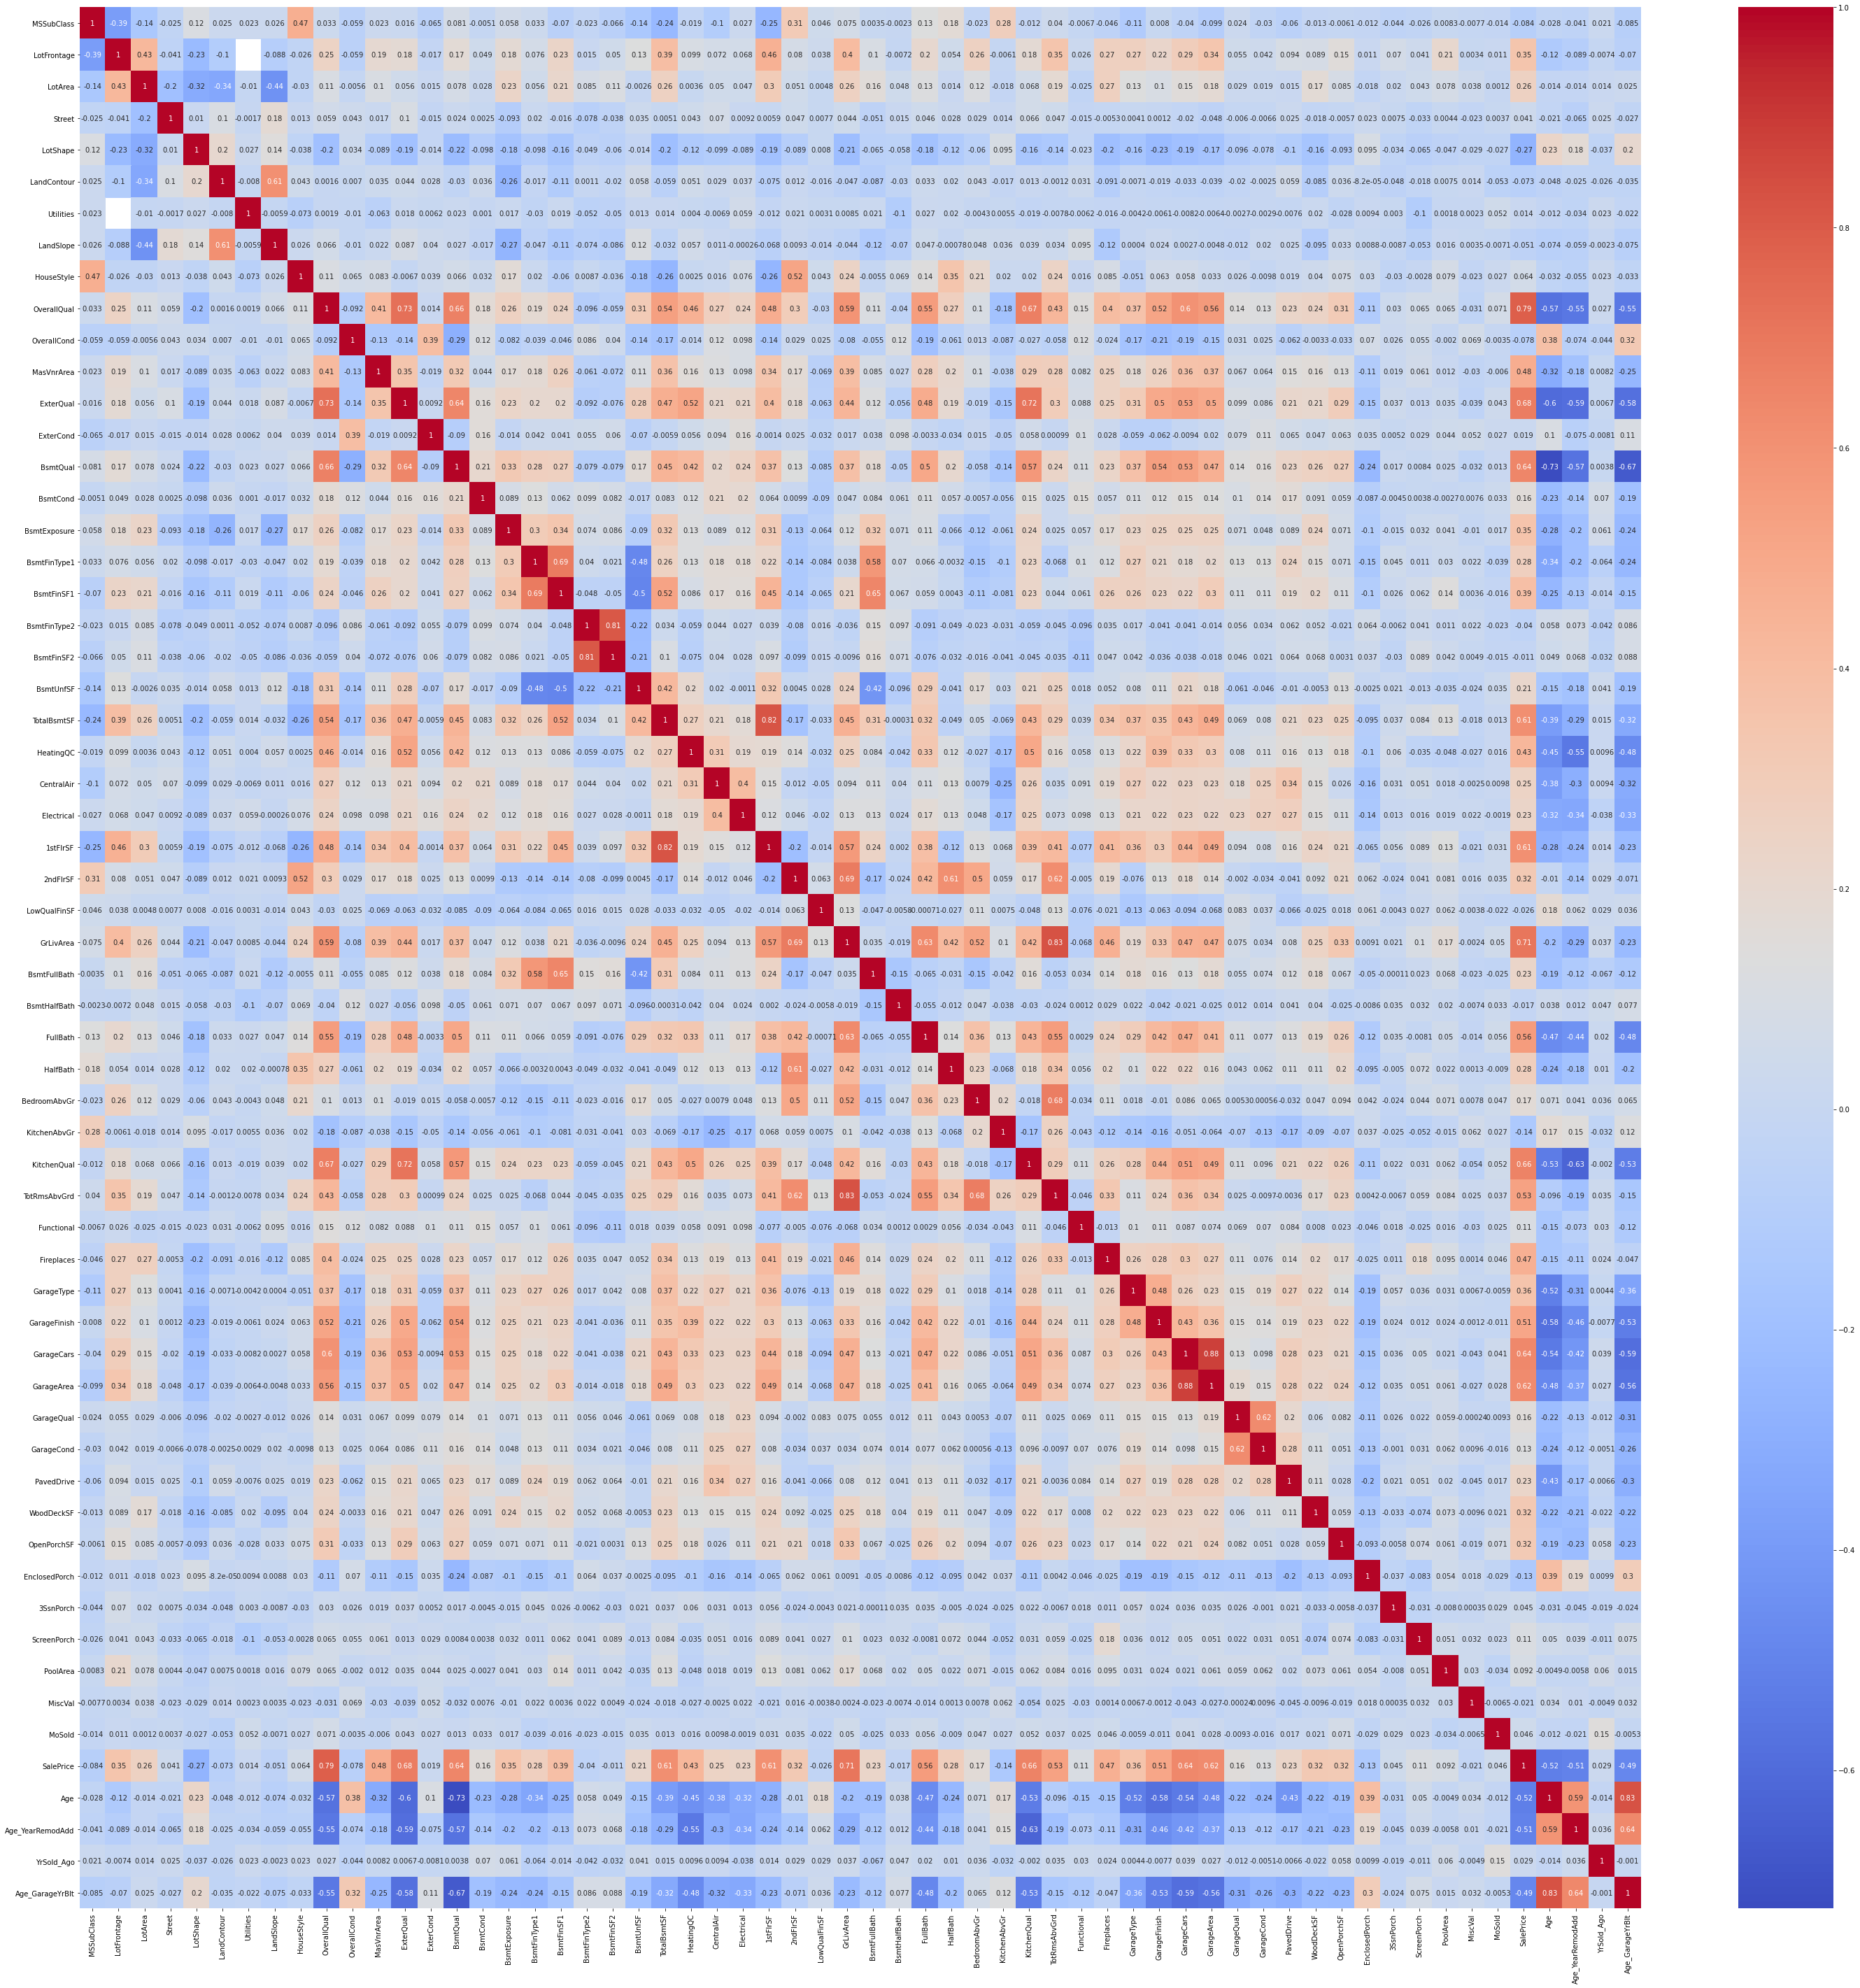

In [31]:
plt.figure(figsize = (50,50))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

In [32]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [33]:
# Creating a new DataFrame

df_new = pd.get_dummies(df, prefix = object_col_list,   columns= object_col_list, drop_first = True)

In [34]:
df_new.isnull().sum()

MSSubClass                 0
LotFrontage              259
LotArea                    0
Street                     0
LotShape                   0
LandContour                0
Utilities                  0
LandSlope                  0
HouseStyle                 0
OverallQual                0
OverallCond                0
MasVnrArea                 8
ExterQual                  0
ExterCond                  0
BsmtQual                  37
BsmtCond                  37
BsmtExposure              38
BsmtFinType1              37
BsmtFinSF1                 0
BsmtFinType2              38
BsmtFinSF2                 0
BsmtUnfSF                  0
TotalBsmtSF                0
HeatingQC                  0
CentralAir                 0
Electrical                 1
1stFlrSF                   0
2ndFlrSF                   0
LowQualFinSF               0
GrLivArea                  0
BsmtFullBath               0
BsmtHalfBath               0
FullBath                   0
HalfBath                   0
BedroomAbvGr  

In [35]:
df_new.columns[df_new.isnull().any()]

Index(['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'Age_GarageYrBlt'],
      dtype='object')

Text(0.5, 1.0, 'dist of lotfronatage')

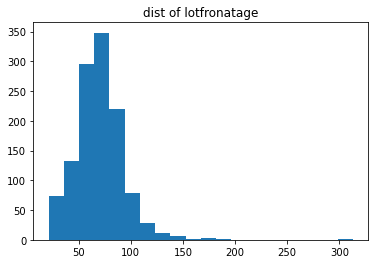

In [36]:
plt.hist(x = df_new['LotFrontage'],bins = 20, histtype = 'bar')
plt.title('dist of lotfronatage')

(array([939., 138., 126.,  93.,  56.,  38.,  13.,  16.,  10.,   9.,   3.,
          3.,   2.,   2.,   2.,   0.,   0.,   1.,   0.,   1.]),
 array([   0.,   80.,  160.,  240.,  320.,  400.,  480.,  560.,  640.,
         720.,  800.,  880.,  960., 1040., 1120., 1200., 1280., 1360.,
        1440., 1520., 1600.]),
 <BarContainer object of 20 artists>)

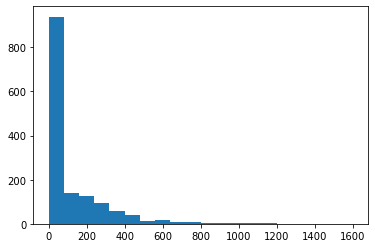

In [37]:
plt.hist(x = df_new['MasVnrArea'], bins=20)

In [38]:
# Filling Null Values with Median and Mode

def filbymed(col_list):
    for col in col_list:
        df_new[col].fillna(df_new[col].median(), inplace = True)
        
def filbymode(col_list):
    for col in col_list:
        df_new[col].fillna(df_new[col].mode()[0], inplace = True)
        
median_col = ['MasVnrArea', 'LotFrontage']
mode_col = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'Age_GarageYrBlt']

filbymed(median_col)
filbymode(mode_col)

# Treat outliers, using seaborn and IQR method


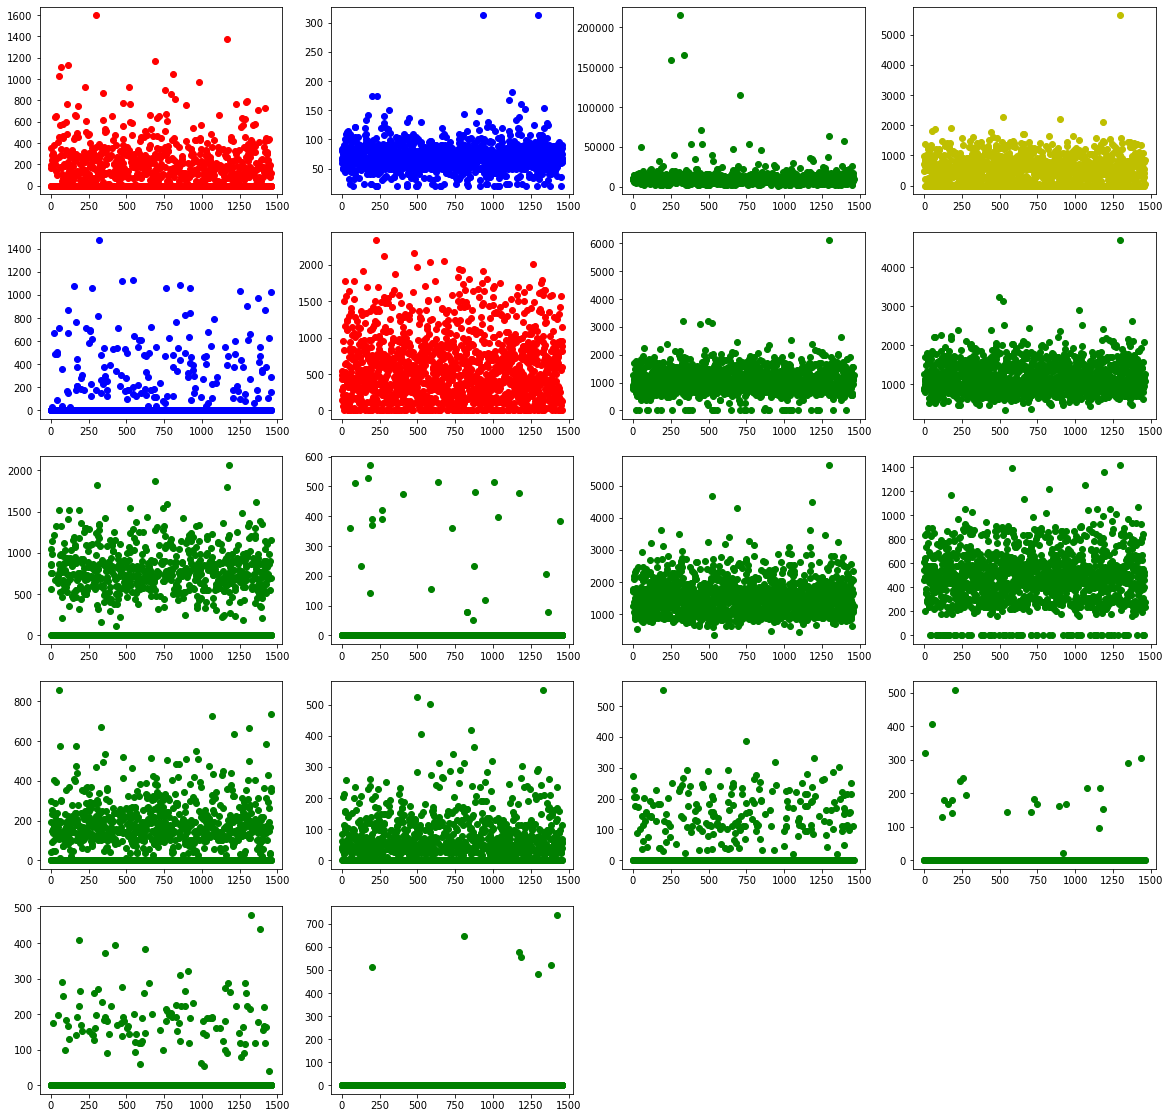

In [39]:
# Using Subplot to see outliers.

plt.figure(figsize = (20,20))
plt.subplot(5,4,1)
plt.plot(df_new['MasVnrArea'], 'ro')

plt.subplot(5,4,2)
plt.plot(df_new['LotFrontage'], 'bo')

plt.subplot(5,4,3)
plt.plot(df_new['LotArea'], 'go')

plt.subplot(5,4,4)
plt.plot(df_new['BsmtFinSF1'], 'yo')

plt.subplot(5,4,5)
plt.plot(df_new['BsmtFinSF2'], 'bo')

plt.subplot(5,4,6)
plt.plot(df_new['BsmtUnfSF'], 'ro')

plt.subplot(5,4,7)
plt.plot(df_new['TotalBsmtSF'], 'go')

plt.subplot(5,4,8)
plt.plot(df_new['1stFlrSF'], 'go')

plt.subplot(5,4,9)
plt.plot(df_new['2ndFlrSF'], 'go')

plt.subplot(5,4,10)
plt.plot(df_new['LowQualFinSF'], 'go')

plt.subplot(5,4,11)
plt.plot(df_new['GrLivArea'], 'go')

plt.subplot(5,4,12)
plt.plot(df_new['GarageArea'], 'go')

plt.subplot(5,4,13)
plt.plot(df_new['WoodDeckSF'], 'go')

plt.subplot(5,4,14)
plt.plot(df_new['OpenPorchSF'], 'go')

plt.subplot(5,4,15)
plt.plot(df_new['EnclosedPorch'], 'go')

plt.subplot(5,4,16)
plt.plot(df_new['3SsnPorch'], 'go')

plt.subplot(5,4,17)
plt.plot(df_new['ScreenPorch'], 'go')

plt.subplot(5,4,18)
plt.plot(df_new['PoolArea'], 'go')


In [40]:
# defining function for IQR

def outliers_iqr(col):
    print(col)
    q1 = np.percentile(df_new[col], 25)
    print(q1)
    q3 = np.percentile(df_new[col], 75)
    print(q3)
    iqr = q3-q1
    print(iqr)
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    outliers = df_new.loc[(df_new[col]<lower_bound) | (df_new[col]>upper_bound), col].index
    print(len(outliers))
    print('outliers: ', outliers)
    print('median', df_new[col].median())
    df_new.loc[df_new[col].index.isin(outliers), col] = df_new[col].median()
    
outliers_col = ['MasVnrArea', 'LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
               '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
               'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']

for col in outliers_col:
    outliers_iqr(col)

MasVnrArea
0.0
164.25
164.25
98
outliers:  Int64Index([  25,   37,   45,   56,   58,   64,   70,   80,   81,   82,  104,
             105,  109,  115,  151,  159,  161,  169,  173,  178,  180,  224,
             231,  235,  249,  251,  297,  343,  349,  359,  362,  363,  403,
             412,  423,  477,  479,  481,  517,  523,  524,  539,  540,  591,
             598,  618,  623,  640,  654,  661,  678,  691,  700,  702,  718,
             731,  755,  759,  763,  769,  798,  803,  808,  815,  825,  895,
             898,  944,  955,  961,  981,  987,  990,  997, 1059, 1083, 1111,
            1169, 1191, 1193, 1209, 1228, 1256, 1268, 1275, 1286, 1287, 1289,
            1298, 1324, 1336, 1353, 1373, 1417, 1420, 1426, 1437, 1447],
           dtype='int64')
median 0.0
LotFrontage
60.0
79.0
19.0
106
outliers:  Int64Index([  25,   35,   36,   41,   52,   56,   75,   85,   86,  145,  150,
             159,  161,  171,  193,  195,  197,  225,  227,  231,  232,  235,
             260,  264,  

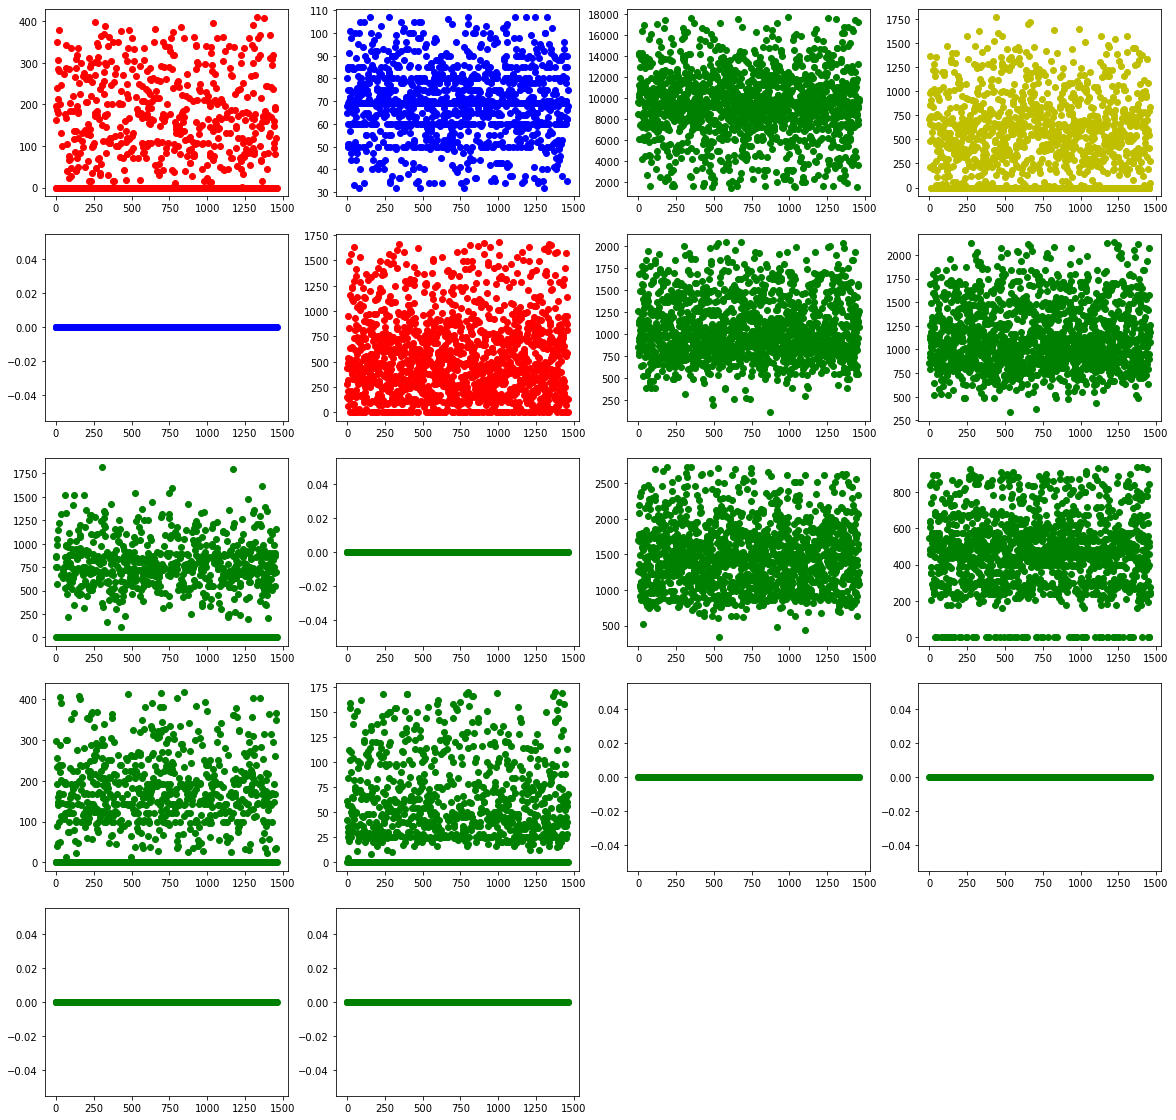

In [41]:
# Visualizing the new data with 0 outliers

plt.figure(figsize = (20,20))
plt.subplot(5,4,1)
plt.plot(df_new['MasVnrArea'], 'ro')

plt.subplot(5,4,2)
plt.plot(df_new['LotFrontage'], 'bo')

plt.subplot(5,4,3)
plt.plot(df_new['LotArea'], 'go')

plt.subplot(5,4,4)
plt.plot(df_new['BsmtFinSF1'], 'yo')

plt.subplot(5,4,5)
plt.plot(df_new['BsmtFinSF2'], 'bo')

plt.subplot(5,4,6)
plt.plot(df_new['BsmtUnfSF'], 'ro')

plt.subplot(5,4,7)
plt.plot(df_new['TotalBsmtSF'], 'go')

plt.subplot(5,4,8)
plt.plot(df_new['1stFlrSF'], 'go')

plt.subplot(5,4,9)
plt.plot(df_new['2ndFlrSF'], 'go')

plt.subplot(5,4,10)
plt.plot(df_new['LowQualFinSF'], 'go')

plt.subplot(5,4,11)
plt.plot(df_new['GrLivArea'], 'go')

plt.subplot(5,4,12)
plt.plot(df_new['GarageArea'], 'go')

plt.subplot(5,4,13)
plt.plot(df_new['WoodDeckSF'], 'go')

plt.subplot(5,4,14)
plt.plot(df_new['OpenPorchSF'], 'go')

plt.subplot(5,4,15)
plt.plot(df_new['EnclosedPorch'], 'go')

plt.subplot(5,4,16)
plt.plot(df_new['3SsnPorch'], 'go')

plt.subplot(5,4,17)
plt.plot(df_new['ScreenPorch'], 'go')

plt.subplot(5,4,18)
plt.plot(df_new['PoolArea'], 'go')


## Train-test spliting and Feature scaling

In [42]:
# split into x and y
x = df_new.drop('SalePrice', axis = 'columns')
y = df_new['SalePrice']

In [43]:
from sklearn.preprocessing import StandardScaler  
scalar = StandardScaler()
X = scalar.fit_transform(x)

In [44]:
# Split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 101)

# Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [46]:
y_train_pred = LR.predict(x_train)
y_test_pred = LR.predict(x_test)

In [47]:
from sklearn import metrics

In [48]:
print(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

26061.079227098355
3166683176901386.5


In [49]:
from sklearn.metrics import r2_score
r2_train_score_LR  = r2_score(y_train, y_train_pred)
r2_test_score_LR = r2_score(y_test, y_test_pred)

print('R2 score for train: ', r2_train_score_LR)
print('R2 Score for test: ', r2_test_score_LR)

R2 score for train:  0.8922478263819684
R2 Score for test:  -1.5885238305146502e+21


# Decision Tree Regressor

In [50]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth= 13)
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=13)

In [51]:
y_train_pred1 = dt.predict(x_train)
y_test_pred1 = dt.predict(x_test)

In [52]:
print(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred1)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred1)))

3510.139845708538
46710.737614815174


In [53]:
r2_train_score_dt = r2_score(y_train, y_train_pred1)
r2_test_score_dt = r2_score(y_test, y_test_pred1)

print('Decision Tree R2 score for train: ', r2_train_score_dt)
print('Decision Tree R2 Score for test: ', r2_test_score_dt)

Decision Tree R2 score for train:  0.9980452551154375
Decision Tree R2 Score for test:  0.654364807926592


# Random Forest Regressor

In [54]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor( n_estimators= 10)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10)

In [55]:
y_train_pred2 = rf.predict(x_train)
y_test_pred2 = rf.predict(x_test)

In [56]:
print(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred2)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred2)))

15740.264561028678
35074.95214605717


In [57]:
r2_train_score_rf = r2_score(y_train, y_train_pred2)
r2_test_score_rf = r2_score(y_test, y_test_pred2)

print('Random Forest R2 score for train: ', r2_train_score_rf)
print('Random Forest R2 Score for test: ', r2_test_score_rf)

Random Forest R2 score for train:  0.9606934160392754
Random Forest R2 Score for test:  0.805114880837354


# Support vector machine

In [58]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)

SVR()

In [59]:
y_train_pred3 = svr.predict(x_train)
y_test_pred3 = svr.predict(x_test)

In [60]:
print(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred3)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred3)))

81268.22561798898
80943.61188856266


In [61]:
r2_train_score_svm = r2_score(y_train, y_train_pred3)
r2_test_score_svm = r2_score(y_test, y_test_pred3)

print('Random Forest R2 score for train: ', r2_train_score_svm)
print('Random Forest R2 Score for test: ', r2_test_score_svm)

Random Forest R2 score for train:  -0.047810634482260195
Random Forest R2 Score for test:  -0.037886024379365946


## Random Forest gives the Best results. Gridsearchcv on Random Forest to make model more accurate

In [62]:
#using gridsearchcv in randomforest
rf_params = [{'n_estimators':  list(range(10, 100, 10)), 'max_depth': list(range(10, 15))}]
from sklearn.model_selection import GridSearchCV
gsc = GridSearchCV(estimator = rf, param_grid = rf_params, cv =10, scoring = 'neg_root_mean_squared_error')

In [64]:
gsc.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(n_estimators=10),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80,
                                           90]}],
             scoring='neg_root_mean_squared_error')

In [72]:
print('Best Parameters: ', gsc.best_params_)
print('Best Score: ', gsc.best_score_)

Best Parameters:  {'max_depth': 14, 'n_estimators': 60}
Best Score:  -31311.172141183262


In [70]:
rf_final = RandomForestRegressor( n_estimators= 60, max_depth = 14)
rf_final.fit(x_train, y_train)
y_train_pred4 = rf_final.predict(x_train)
y_test_pred4 = rf_final.predict(x_test)
print('MSE train: ', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred4)))
print('MSE test: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred4)))

r2_train_score_rf_final = r2_score(y_train, y_train_pred4)
r2_test_score_rf_final = r2_score(y_test, y_test_pred4)

print('Final Random Forest R2 score for train: ', r2_train_score_rf_final)
print('Final Random Forest R2 Score for test: ', r2_test_score_rf_final)

MSE train:  12341.227921111655
MSE test:  33073.95634381692
Final Random Forest R2 score for train:  0.9758366028092869
Final Random Forest R2 Score for test:  0.8267166632121997


In [73]:
print(gsc.best_estimator_)

RandomForestRegressor(max_depth=14, n_estimators=60)
